# Scale Invariant Feature Transform (SIFT) Detection
***

In [26]:
# notebook imports
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
# loading in images 
flowers = cv2.imread('../Image_Data/flowers.jpg')
flowers = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
gray_flowers = cv2.cvtColor(flowers, cv2.COLOR_RGB2GRAY)

***
## Scale Space Extrema Detection

In [3]:
# need to show how LoG works, and how that approximates the Gaussian kernel as well
# testing out 2D Gaussian function - think about deleting this
def gaussTwoDee(std_dev, img):
    res = []
    for row in range(len(img)):
        for col in range(len(img[0])):
            g = (1/2*np.pi*std_dev*std_dev) * np.e ** (-((row * row + col * col)/2 * std_dev * std_dev))
            res.append(g)
    return res

In [8]:
gauss = gaussTwoDee(1, gray_flowers)
gauss.sort()

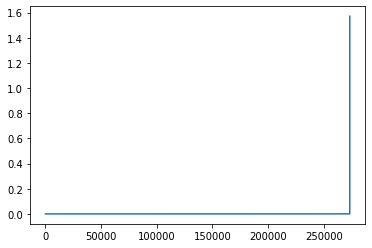

In [9]:
plt.plot(gauss)
plt.show()

In [13]:
sigma = 1.6
size = 2*np.ceil(3*sigma)+1 
x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1] 
y

array([[-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]])

In [62]:
# Messing around with LoG function 
def create_LoG(sigma, k_size):
    kernel = np.zeros((k_size, k_size))
    pos_offset = k_size//2
    neg_offset = -pos_offset
    for x in range(neg_offset, pos_offset + 1):
        for y in range(neg_offset, pos_offset + 1):
            r = math.sqrt(x * x + y * y)
            s = 2 * sigma ** 2
            LoG = ((1 - (r * r)/s) * (np.e ** (-((r * r)/s)))) / (-(math.pi * sigma ** 4))
            kernel[x + pos_offset, y + pos_offset] = LoG
    return kernel

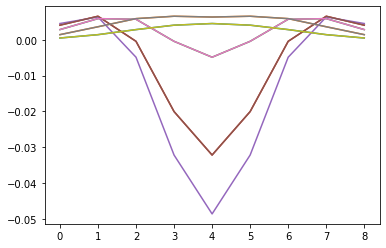

In [78]:
sigma = 1.6
res = create_LoG(sigma, 9)
plt.plot(res)
plt.show()

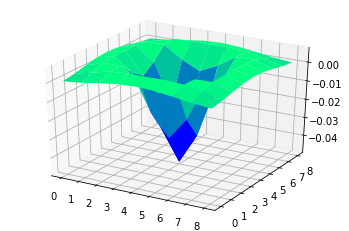

In [79]:
xv, yv = np.mgrid[0:res.shape[0], 0:res.shape[1]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dem3d=ax.plot_surface(xv,yv,res, cmap='winter', edgecolor='none')
plt.show()

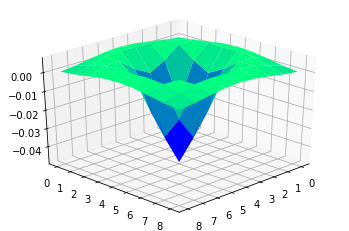

In [84]:
ax.view_init(30, 45)
fig

In [ ]:
def DoG()

***

## References
* https://medium.com/@lerner98/implementing-sift-in-python-36c619df7945
* https://medium.com/data-breach/introduction-to-sift-scale-invariant-feature-transform-65d7f3a72d40
* https://en.wikipedia.org/wiki/Scale-invariant_feature_transform
* https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
* https://en.wikipedia.org/wiki/Difference_of_Gaussians